In [131]:
import pandas as pd
import ipaddress
import numpy as np
import pandasql as ps
import matplotlib.pyplot as plt
import scipy.stats as stats

%matplotlib inline

In [132]:
#creating the dataframes
htdf03 = pd.read_csv('~/Documents/Data/2003df.csv')
htdf10 = pd.read_csv('~/Documents/Data/2010df.csv')
htdf17 = pd.read_csv('~/Documents/Data/2017df.csv')

In [133]:
#adding a column for success/failure
htdf03['s'] = np.where(htdf03['country']=='United States of America', 1, 0)
htdf10['s'] = np.where(htdf10['country']=='United States of America', 1, 0)
htdf17['s'] = np.where(htdf17['country']=='United States of America', 1, 0)

In [134]:
#Summing the column 's' gives the number of successful hits of a US IP address
total_US_hits2010 = sum(htdf10['s'])
total_US_hits2017 = sum(htdf17['s'])
total_hits2010 = len(htdf10)
total_hits2017 = len(htdf17)

sumofab = total_hits2017 + total_hits2010
multofab = total_hits2017 * total_hits2010
#calculating the value for the entire population
shared_sample_freq = (total_US_hits2010 + total_US_hits2017) / sumofab
shared_sample_variance = sumofab * (shared_sample_freq * (1 - shared_sample_freq)) / multofab

diff_proportions = stats.norm(0, np.sqrt(shared_sample_variance))

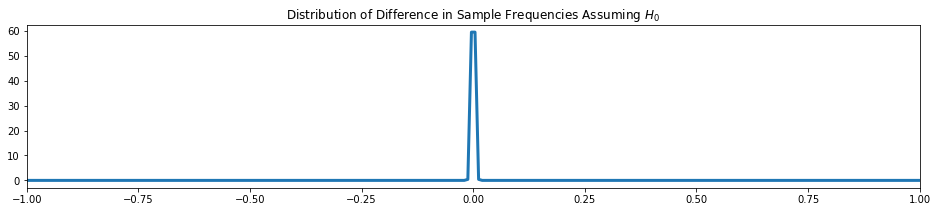

In [121]:
fig, ax = plt.subplots(1, figsize=(16, 3))

x = np.linspace(-1, 1, num=250)
ax.plot(x, diff_proportions.pdf(x), linewidth=3)
ax.set_xlim(-1, 1)
ax.set_title("Distribution of Difference in Sample Frequencies Assuming $H_0$")
fig.savefig("DistributionofDiff_Null.png")

In [62]:
#Calculate the Probability of Finding a Result Equally or More Extreme than Actually Observed Assuming the Probabilistic Model You Created

In [122]:
Freq2003 = a2003/b2003
Freq2010 = a2010/b2010
Freq2017 = a2017/b2017
diff_sampproportions = Freq2017 - Freq2010
print("Difference in sample proportions: {:2.2f}".format(diff_sampproportions))

Difference in sample proportions: -0.19


In [123]:
p_value = 1 - diff_proportions.cdf(diff_sampproportions)
print("p-value for EDGAR US Hits frequency comparison: {:2f}".format(p_value))

p-value for EDGAR US Hits frequency comparison: 1.000000


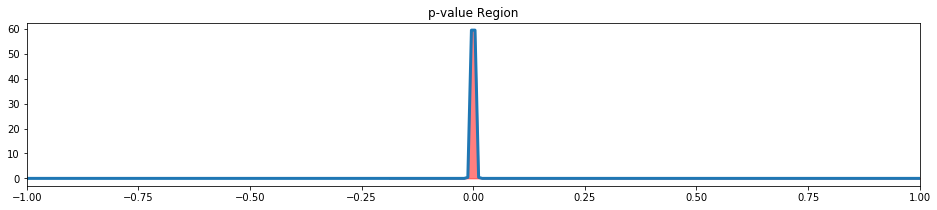

In [124]:
fig, ax = plt.subplots(1, figsize=(16, 3))

x = np.linspace(-1, 1, num=250)
ax.plot(x, diff_proportions.pdf(x), linewidth=3)
ax.fill_between(x, diff_proportions.pdf(x), where=(x >= diff_sampproportions),
                color="red", alpha=0.5)
ax.set_xlim(-1, 1)
ax.set_title("p-value Region")
fig.savefig("p-valueRegion.png")

In [ ]:
#Checking This against a Z-Test for personal edification

In [125]:
#total_US_hits2003 = sum(docdf03['s'])
total_US_hits10 = sum(htdf10['s'])
total_US_hits17 = sum(htdf17['s'])
#total_hits2003 = len(docdf03)
total_hits10 = len(htdf10)
total_hits17 = len(htdf17)

In [126]:
diffsampprop = (total_US_hits17/total_hits17) - (total_US_hits10/total_hits10)
pcombined = (total_US_hits17+total_US_hits10)/(total_hits17+total_hits10)
pcombined

0.7120403269564

In [127]:
totvar = np.sqrt((pcombined*(1-pcombined)/total_hits17)+(pcombined*(1-pcombined)/total_hits10))

In [128]:
totvar

0.003603206758956925

In [129]:
z = diffsampprop/totvar

In [130]:
z

-53.33650200286285